In [1]:
import os
path = './coco'
import json
file = open(path+"/annotations/captions_train2014.json")
captions = json.load(file)

In [2]:
captions.keys()

dict_keys(['info', 'images', 'licenses', 'annotations'])

In [3]:
captions['info']

{'description': 'COCO 2014 Dataset',
 'url': 'http://cocodataset.org',
 'version': '1.0',
 'year': 2014,
 'contributor': 'COCO Consortium',
 'date_created': '2017/09/01'}

In [4]:
captions['licenses']

[{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/',
  'id': 1,
  'name': 'Attribution-NonCommercial-ShareAlike License'},
 {'url': 'http://creativecommons.org/licenses/by-nc/2.0/',
  'id': 2,
  'name': 'Attribution-NonCommercial License'},
 {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/',
  'id': 3,
  'name': 'Attribution-NonCommercial-NoDerivs License'},
 {'url': 'http://creativecommons.org/licenses/by/2.0/',
  'id': 4,
  'name': 'Attribution License'},
 {'url': 'http://creativecommons.org/licenses/by-sa/2.0/',
  'id': 5,
  'name': 'Attribution-ShareAlike License'},
 {'url': 'http://creativecommons.org/licenses/by-nd/2.0/',
  'id': 6,
  'name': 'Attribution-NoDerivs License'},
 {'url': 'http://flickr.com/commons/usage/',
  'id': 7,
  'name': 'No known copyright restrictions'},
 {'url': 'http://www.usa.gov/copyright.shtml',
  'id': 8,
  'name': 'United States Government Work'}]

In [5]:
captions['images'][:2]

[{'license': 5,
  'file_name': 'COCO_train2014_000000057870.jpg',
  'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000057870.jpg',
  'height': 480,
  'width': 640,
  'date_captured': '2013-11-14 16:28:13',
  'flickr_url': 'http://farm4.staticflickr.com/3153/2970773875_164f0c0b83_z.jpg',
  'id': 57870},
 {'license': 5,
  'file_name': 'COCO_train2014_000000384029.jpg',
  'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000384029.jpg',
  'height': 429,
  'width': 640,
  'date_captured': '2013-11-14 16:29:45',
  'flickr_url': 'http://farm3.staticflickr.com/2422/3577229611_3a3235458a_z.jpg',
  'id': 384029}]

In [6]:
length = len(captions['images'][0]['file_name'])
length

31

In [7]:
l = captions['annotations']
l[:2]

[{'image_id': 318556,
  'id': 48,
  'caption': 'A very clean and well decorated empty bathroom'},
 {'image_id': 116100,
  'id': 67,
  'caption': 'A panoramic view of a kitchen and all of its appliances.'}]

In [8]:
out_path = './reports'
out = []
temp = {}

for d in l:
    a = ''
    key = f"{a}{d['image_id']}.jpg"
    while len(key) != length:  
        a += '0'
        key = f"{a}{d['image_id']}.jpg"
    
    if key not in temp:
        temp[key] = [d['caption']] 
    else:
        temp[key].append(d['caption'])
for k, v in temp.items():
    out.append({k: v})



In [12]:
temp['000000000000000000000379340.jpg']

['A graffiti-ed stop sign across the street from a red car ',
 'A vandalized stop sign and a red beetle on the road',
 'A red stop sign with a Bush bumper sticker under the word stop.',
 'A stop sign that has been vandalized is pictured in front of a parked car.',
 'A street sign modified to read stop bush.']

In [13]:
count = 0
for i in out:
    print(i)
    if count ==3:
        break
    count+=1


{'000000000000000000000318556.jpg': ['A very clean and well decorated empty bathroom', 'A blue and white bathroom with butterfly themed wall tiles.', 'A bathroom with a border of butterflies and blue paint on the walls above it.', 'An angled view of a beautifully decorated bathroom.', 'A clock that blends in with the wall hangs in a bathroom. ']}
{'000000000000000000000116100.jpg': ['A panoramic view of a kitchen and all of its appliances.', 'A panoramic photo of a kitchen and dining room', 'A wide angle view of the kitchen work area', 'multiple photos of a brown and white kitchen. ', 'A kitchen that has a checkered patterned floor and white cabinets.']}
{'000000000000000000000379340.jpg': ['A graffiti-ed stop sign across the street from a red car ', 'A vandalized stop sign and a red beetle on the road', 'A red stop sign with a Bush bumper sticker under the word stop.', 'A stop sign that has been vandalized is pictured in front of a parked car.', 'A street sign modified to read stop bu

In [14]:
out[:5]

[{'000000000000000000000318556.jpg': ['A very clean and well decorated empty bathroom',
   'A blue and white bathroom with butterfly themed wall tiles.',
   'A bathroom with a border of butterflies and blue paint on the walls above it.',
   'An angled view of a beautifully decorated bathroom.',
   'A clock that blends in with the wall hangs in a bathroom. ']},
 {'000000000000000000000116100.jpg': ['A panoramic view of a kitchen and all of its appliances.',
   'A panoramic photo of a kitchen and dining room',
   'A wide angle view of the kitchen work area',
   'multiple photos of a brown and white kitchen. ',
   'A kitchen that has a checkered patterned floor and white cabinets.']},
 {'000000000000000000000379340.jpg': ['A graffiti-ed stop sign across the street from a red car ',
   'A vandalized stop sign and a red beetle on the road',
   'A red stop sign with a Bush bumper sticker under the word stop.',
   'A stop sign that has been vandalized is pictured in front of a parked car.',
 

In [11]:
out_path = r'C:\Users\spnar\OneDrive\Desktop\Project\coco2017.json'
with open(out_path,'w') as file:
    json.dump(out,file)

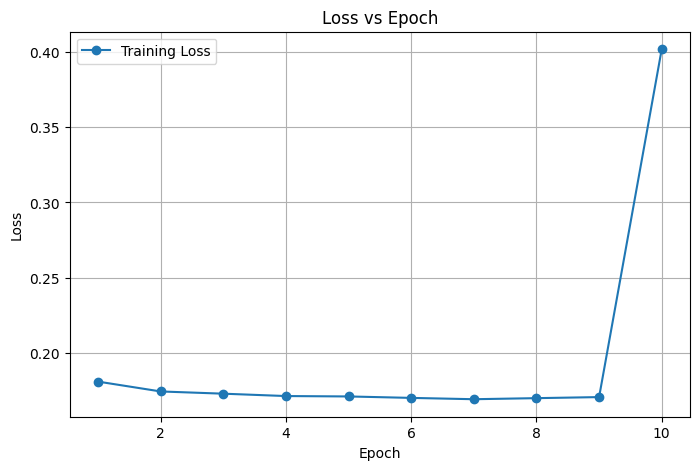

In [2]:
import torch
import os
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
model_path = '/teamspace/studios/this_studio/Latent-Diffusion-Model-for-text-to-image-generation/ldm_checkpoints'

# Store epoch numbers and losses
epochs = []
losses = []

for epoch in range(1, 11):
    ckpt_path = os.path.join(model_path, f"epoch_{epoch}")
    checkpoint = torch.load(os.path.join(ckpt_path, "training_state.pth"), map_location=device)
    
    # Assuming 'loss' is stored directly in checkpoint
    loss = checkpoint['loss']
    
    epochs.append(epoch)
    losses.append(loss)

# Plot all epochs after loop
plt.figure(figsize=(8, 5))
plt.plot(epochs, losses, marker='o', linestyle='-', label='Training Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
